# Plan

1. import data and split training and testing sets. keep data all numerical and bounded between 0 and 1.
2. create class, 784 inputs, 10 outputs, 2 hidden layers, following the Linear formula with reLU.
3. train, test.

### Managing Data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

In [2]:
df = pd.read_csv("assets/train.csv", dtype=float)
# test = pd.read_csv("assetstest.csv", dtype=float)

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
split = int(0.8*len(df))

train = df[:split]
test = df[split:]

In [35]:
x_train = train.iloc[:, 1:]
y_train = train.iloc[:, 0]

x_test = test.iloc[:, 1:]
y_test = test.iloc[:, 0]

In [36]:
x_train = x_train/255
x_test = x_test/255

In [37]:
x_train.iloc[:, 200:300] # random boundaries, just to show that my variables are all between 0 and 1, both included.

,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,...,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299
0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.364706,0.996078,0.992157,0.933333,0.666667,0.066667
1,0.0,0.0,0.0,0.282353,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.262745,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.501961,0.988235,0.996078
2,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.035294,0.996078,...,0.000000,0.000000,0.035294,0.996078,0.996078,0.721569,0.000000,0.000000,0.000000,0.000000
3,0.0,0.0,0.0,0.949020,0.607843,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.764706,0.254902
4,0.0,0.0,0.0,0.121569,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.764706,0.000000,0.000000,0.000000,0.000000,0.000000,0.407843,0.878431,0.992157,0.992157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33595,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.733333,0.996078,0.443137,0.000000,0.000000,0.000000,0.000000
33596,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.180392,0.392157,...,0.254902,0.996078,0.917647,0.172549,0.000000,0.000000,0.000000,0.980392,0.882353,0.011765
33597,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.576471,0.937255,0.992157,...,0.992157,0.992157,0.976471,0.529412,0.149020,0.000000,0.000000,0.000000,0.000000,0.349020
33598,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.035294,0.698039,0.996078,0.333333,0.000000


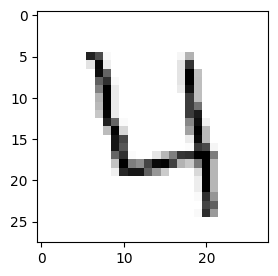

In [41]:
plt.figure(figsize=(3,3))
plt.imshow(x_train.to_numpy()[3].reshape(28,28), cmap=plt.cm.binary) # color map to color in binray, white or black

Divide dataset into batches

In [9]:
x_train = torch.tensor(x_train.values, dtype=torch.float32, device="cuda")
y_train = torch.tensor(y_train.values, dtype=torch.long, device="cuda")

y_test = torch.tensor(y_test.values,dtype=torch.float32, device="cuda")
x_test = torch.tensor(x_test.values,dtype=torch.float32, device="cuda")

dataset = TensorDataset(x_train, y_train)
train_loader = DataLoader(dataset, batch_size=64, shuffle=True)

### Creating NN class

In [10]:
class digit_recognition(nn.Module):
    def __init__(self):
        super(digit_recognition, self).__init__()

        self.fc1=nn.Linear(784, 128)
        self.fc2=nn.Linear(128, 128)
        self.fc3=nn.Linear(128, 10)

    def forward(self, x: torch.TensorType):

        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x) # we didn't pass the final layer into an activation function since our loss crossentropy will do so
        return x


In [11]:
model = digit_recognition().to("cuda")

In [12]:
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

### Train and Test

In [13]:
epochs=100

for epoch in range(epochs):
    model.train()
    for batch_id, (inputs, outputs) in enumerate(train_loader):
        
        outputs_predicted = model(inputs)
        ls = loss(outputs_predicted, outputs)
        optimizer.zero_grad()
        ls.backward()
        optimizer.step()

In [14]:
with torch.no_grad():
    model.eval()
    outputs_pred = model(x_test)
    _, predicted = torch.max(outputs_pred, 1)
    correct = (predicted == y_test).sum().item()
    total = y_test.size(0)
    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 97.57%


In [15]:
predicted

tensor([0, 7, 7,  ..., 7, 6, 9], device='cuda:0')

In [16]:
outputs_pred

tensor([[ 41.9443, -56.3360, -18.2100,  ..., -35.6188, -21.8643, -31.8012],
        [-39.8233, -29.5284, -27.9975,  ...,  31.3075, -21.5155,  -5.6179],
        [-16.6886,  -6.8797,  -9.4815,  ...,  13.4643, -12.3508, -15.3528],
        ...,
        [-42.1083, -39.8609, -18.5723,  ...,  25.9865, -12.0378,  -9.8146],
        [-24.2894,  -9.5513, -12.7166,  ..., -36.9807, -18.6350, -27.1202],
        [-11.4293, -20.2720,  -2.6250,  ...,  -8.9660,  -2.6727,  13.4099]],
       device='cuda:0')

In [17]:
a = 112

In [30]:
model.eval()
with torch.inference_mode():
    output = model(x_test[a])
    _, p = torch.max(output, 0)

tensor(5, device='cuda:0')


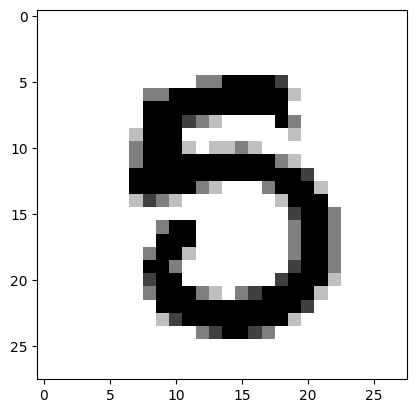

In [19]:
plt.imshow(x_test.cpu()[a].reshape(28,28), cmap=plt.cm.binary)
print(p)

In [27]:
for param in model.state_dict():
        print(param, "\t", model.state_dict()[param].size())

fc1.weight 	 torch.Size([128, 784])
fc1.bias 	 torch.Size([128])
fc2.weight 	 torch.Size([128, 128])
fc2.bias 	 torch.Size([128])
fc3.weight 	 torch.Size([10, 128])
fc3.bias 	 torch.Size([10])


### Save model

In [ ]:
torch.save(model.state_dict(), './model1.pt')

In [ ]:
model2 = digit_recognition()
